In [117]:
import numpy as np 
import operator
from collections import Counter
import matplotlib.pyplot as plt
import random as ran
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 
from csv import reader


# All functions are defined here


# prepare our data for use
def convert_raw_data():
    with open("iris.data", "r") as f:
    
        iris_dataset = list(reader(f))

        iris_dataset.pop(-1)
        for row in iris_dataset:
            for i in range(4):
              row[i] = float(row[i].strip())
            
        f.close()
        
    return iris_dataset

# assigns iris class 
def class_assign(data):
    class_values = [row[4] for row in data]
    classes = dict()
    for i, value in enumerate(set(class_values)):
        classes[value] = i
    for row in data:
        row[4] = classes[row[4]]

    return data,classes

# to split our data in some ratio eg=0.7
def split_data(data, n):
    ran.shuffle(data)
    
    dev_data = data[:int(n*len(data))]
    test_data = data[int(n*len(data)):]
    
    return dev_data,test_data

# euclidian distance calculation
def e_dist(r1, r2):
    e_dist = 0.0
    for i in range(len(r1)-1):
        e_dist += (r1[i] - r2[i])**2
    
    return e_dist**(0.5)

# normalized euclidian distance calculation
def ne_dist(r1, r2):
    ne_dist = 0.0
    for i in range(len(r1)-1):
        mean = (r1[i] - r2[i])/2
        denom = (r1[i] - mean) ** 2 + (r2[i] - mean) ** 2
        
        if(denom != 0):
            ne_dist += ((r1[i] - r2[i])**2 / denom)
        else:
            ne_dist = 0
            
    return ne_dist**(0.5)

# cosine distance calculation
def cos_dist(r1, r2):
    mul_val = 0.0
    r1_dist = 0.0
    r2_dist = 0.0
    
    for i in range(len(r1)-1):
        mul_val += r1[i] * r2[i]
        r1_dist += r1[i] * r1[i]
        
    for i in range(len(r2)-1):
        r2_dist += r2[i] * r2[i]
        
    cos_dist = mul_val/((r1_dist * r2_dist)**(0.5))
    return ( 1- cos_dist)

# kNN implementation
def kNN(data, k, d_method):
    result = []
    total_corr = 0
    
    for d in data:
        new = data.copy()
        new.remove(d)
        
        dists = list()
        for row in new:
            dist = d_method(d, row)
            dists.append((row, dist))
        dists.sort(key = operator.itemgetter(1))
        nbrs = []
        for i in range(k):
            nbrs.append(dists[i][0])
            
        '''correct = {}
        for n in nbrs:
            label = n[-1]
            if label in correct:
                correct[label] += 1
            else:
                correct[label] = 1
        correct_sorted = sorted(correct.items(), key = operator.itemgetter(1), reverse = True)
        if correct_sorted[0][0] == d[-1]:
            total_corr += 1'''
        
        nbrs_list = list()
        for n in nbrs:
            nbrs_list.append(n[-1])
        nbrs_list_count = Counter(nbrs_list)
        prediction = nbrs_list_count.most_common(1)[0][0]
        if prediction == d[-1]:
            total_corr += 1
        
    accuracy = (total_corr/len(data))*100   
    print(f"Correctly identified result for {k}: {total_corr} AND accuracy is {accuracy}%")
    return total_corr, accuracy

In [118]:
# TASK -- A
# converting and splitting our dataset using defined functions

X = convert_raw_data()
X,y = class_assign(X)
dev,test = split_data(X, 0.7)

In [119]:
print(y)

{'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2}


In [120]:
for data in X:
    print(data)

[6.4, 3.2, 5.3, 2.3, 0]
[6.3, 3.3, 6.0, 2.5, 0]
[5.7, 3.0, 4.2, 1.2, 2]
[6.7, 3.0, 5.0, 1.7, 2]
[6.7, 3.0, 5.2, 2.3, 0]
[6.5, 2.8, 4.6, 1.5, 2]
[6.7, 3.3, 5.7, 2.1, 0]
[6.7, 2.5, 5.8, 1.8, 0]
[5.0, 3.2, 1.2, 0.2, 1]
[5.5, 2.5, 4.0, 1.3, 2]
[4.3, 3.0, 1.1, 0.1, 1]
[6.6, 3.0, 4.4, 1.4, 2]
[4.8, 3.0, 1.4, 0.3, 1]
[5.0, 2.0, 3.5, 1.0, 2]
[5.7, 2.9, 4.2, 1.3, 2]
[5.0, 3.6, 1.4, 0.2, 1]
[4.4, 2.9, 1.4, 0.2, 1]
[7.3, 2.9, 6.3, 1.8, 0]
[5.7, 4.4, 1.5, 0.4, 1]
[5.9, 3.0, 5.1, 1.8, 0]
[5.7, 2.5, 5.0, 2.0, 0]
[6.4, 2.9, 4.3, 1.3, 2]
[5.0, 3.3, 1.4, 0.2, 1]
[5.2, 3.5, 1.5, 0.2, 1]
[4.9, 2.5, 4.5, 1.7, 0]
[6.3, 3.4, 5.6, 2.4, 0]
[4.6, 3.1, 1.5, 0.2, 1]
[5.7, 3.8, 1.7, 0.3, 1]
[6.0, 2.9, 4.5, 1.5, 2]
[5.8, 4.0, 1.2, 0.2, 1]
[4.5, 2.3, 1.3, 0.3, 1]
[6.4, 2.8, 5.6, 2.1, 0]
[7.7, 3.0, 6.1, 2.3, 0]
[5.4, 3.4, 1.7, 0.2, 1]
[4.9, 3.1, 1.5, 0.1, 1]
[6.4, 3.2, 4.5, 1.5, 2]
[5.8, 2.7, 5.1, 1.9, 0]
[5.7, 2.8, 4.5, 1.3, 2]
[7.1, 3.0, 5.9, 2.1, 0]
[5.5, 2.3, 4.0, 1.3, 2]
[5.1, 3.8, 1.6, 0.2, 1]
[6.5, 3.2, 5.1, 

In [121]:
len(dev)

105

In [122]:
for data in dev:
    print(data)

[6.4, 3.2, 5.3, 2.3, 0]
[6.3, 3.3, 6.0, 2.5, 0]
[5.7, 3.0, 4.2, 1.2, 2]
[6.7, 3.0, 5.0, 1.7, 2]
[6.7, 3.0, 5.2, 2.3, 0]
[6.5, 2.8, 4.6, 1.5, 2]
[6.7, 3.3, 5.7, 2.1, 0]
[6.7, 2.5, 5.8, 1.8, 0]
[5.0, 3.2, 1.2, 0.2, 1]
[5.5, 2.5, 4.0, 1.3, 2]
[4.3, 3.0, 1.1, 0.1, 1]
[6.6, 3.0, 4.4, 1.4, 2]
[4.8, 3.0, 1.4, 0.3, 1]
[5.0, 2.0, 3.5, 1.0, 2]
[5.7, 2.9, 4.2, 1.3, 2]
[5.0, 3.6, 1.4, 0.2, 1]
[4.4, 2.9, 1.4, 0.2, 1]
[7.3, 2.9, 6.3, 1.8, 0]
[5.7, 4.4, 1.5, 0.4, 1]
[5.9, 3.0, 5.1, 1.8, 0]
[5.7, 2.5, 5.0, 2.0, 0]
[6.4, 2.9, 4.3, 1.3, 2]
[5.0, 3.3, 1.4, 0.2, 1]
[5.2, 3.5, 1.5, 0.2, 1]
[4.9, 2.5, 4.5, 1.7, 0]
[6.3, 3.4, 5.6, 2.4, 0]
[4.6, 3.1, 1.5, 0.2, 1]
[5.7, 3.8, 1.7, 0.3, 1]
[6.0, 2.9, 4.5, 1.5, 2]
[5.8, 4.0, 1.2, 0.2, 1]
[4.5, 2.3, 1.3, 0.3, 1]
[6.4, 2.8, 5.6, 2.1, 0]
[7.7, 3.0, 6.1, 2.3, 0]
[5.4, 3.4, 1.7, 0.2, 1]
[4.9, 3.1, 1.5, 0.1, 1]
[6.4, 3.2, 4.5, 1.5, 2]
[5.8, 2.7, 5.1, 1.9, 0]
[5.7, 2.8, 4.5, 1.3, 2]
[7.1, 3.0, 5.9, 2.1, 0]
[5.5, 2.3, 4.0, 1.3, 2]
[5.1, 3.8, 1.6, 0.2, 1]
[6.5, 3.2, 5.1, 

In [123]:
len(test)

45

In [124]:
for data in test:
    print(data)

[6.3, 3.3, 4.7, 1.6, 2]
[6.2, 2.8, 4.8, 1.8, 0]
[6.7, 3.3, 5.7, 2.5, 0]
[4.8, 3.1, 1.6, 0.2, 1]
[4.9, 3.1, 1.5, 0.1, 1]
[5.1, 2.5, 3.0, 1.1, 2]
[4.8, 3.4, 1.6, 0.2, 1]
[5.3, 3.7, 1.5, 0.2, 1]
[7.7, 2.6, 6.9, 2.3, 0]
[5.6, 2.9, 3.6, 1.3, 2]
[6.8, 3.2, 5.9, 2.3, 0]
[5.0, 3.4, 1.5, 0.2, 1]
[6.9, 3.2, 5.7, 2.3, 0]
[5.1, 3.8, 1.5, 0.3, 1]
[6.2, 2.9, 4.3, 1.3, 2]
[6.2, 3.4, 5.4, 2.3, 0]
[4.4, 3.0, 1.3, 0.2, 1]
[4.4, 3.2, 1.3, 0.2, 1]
[6.8, 3.0, 5.5, 2.1, 0]
[6.4, 2.8, 5.6, 2.2, 0]
[6.1, 2.8, 4.0, 1.3, 2]
[6.6, 2.9, 4.6, 1.3, 2]
[5.9, 3.0, 4.2, 1.5, 2]
[4.7, 3.2, 1.3, 0.2, 1]
[6.3, 2.5, 4.9, 1.5, 2]
[6.3, 2.5, 5.0, 1.9, 0]
[5.6, 3.0, 4.1, 1.3, 2]
[4.8, 3.4, 1.9, 0.2, 1]
[5.8, 2.8, 5.1, 2.4, 0]
[5.7, 2.6, 3.5, 1.0, 2]
[5.4, 3.4, 1.5, 0.4, 1]
[4.9, 2.4, 3.3, 1.0, 2]
[6.3, 2.7, 4.9, 1.8, 0]
[6.9, 3.1, 5.4, 2.1, 0]
[5.2, 4.1, 1.5, 0.1, 1]
[7.6, 3.0, 6.6, 2.1, 0]
[5.2, 2.7, 3.9, 1.4, 2]
[6.5, 3.0, 5.2, 2.0, 0]
[6.1, 2.9, 4.7, 1.4, 2]
[5.5, 2.4, 3.7, 1.0, 2]
[5.7, 2.8, 4.1, 1.3, 2]
[6.0, 3.4, 4.5, 

In [125]:
# TASK -- B
# example for euclidian distance

e_dist([1, 1], [2, 2])

1.0

In [126]:
# TASK -- B
# example for normalized euclidian distance

ne_dist([1,2,3,4],[1,2,30,40])

0.5803432921972449

In [127]:
# TASK -- B
# example for cosine distance

cos_dist([1,2,1,2], [3,3,3,4])

0.057190958417936644

RESULT FOR Euclidian neighbours
Correctly identified result for 1: 100 AND accuracy is 95.23809523809523%
Correctly identified result for 3: 101 AND accuracy is 96.19047619047619%
Correctly identified result for 5: 101 AND accuracy is 96.19047619047619%
Correctly identified result for 7: 100 AND accuracy is 95.23809523809523%




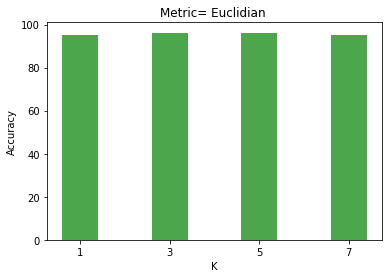

RESULT FOR Normalized Euclidian neighbours
Correctly identified result for 1: 99 AND accuracy is 94.28571428571428%
Correctly identified result for 3: 99 AND accuracy is 94.28571428571428%
Correctly identified result for 5: 100 AND accuracy is 95.23809523809523%
Correctly identified result for 7: 100 AND accuracy is 95.23809523809523%




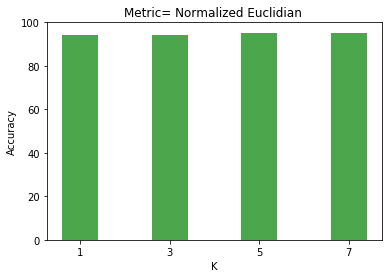

RESULT FOR Cosine neighbours
Correctly identified result for 1: 101 AND accuracy is 96.19047619047619%
Correctly identified result for 3: 103 AND accuracy is 98.09523809523809%
Correctly identified result for 5: 102 AND accuracy is 97.14285714285714%
Correctly identified result for 7: 101 AND accuracy is 96.19047619047619%




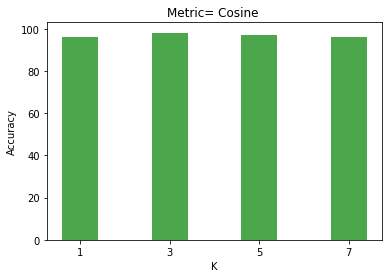

In [128]:
# TASK -- B && C
# using kNN defined functions and..
# finding accuracy and plotting bar chart

K = [1, 3, 5, 7]
methods = {e_dist: "Euclidian ", ne_dist: "Normalized Euclidian ", cos_dist: "Cosine "}
accu_matrix = []
for method in methods.keys():
    accu_row = []
    print("RESULT FOR "+methods[method]+"neighbours")
    for k in K:
        res,acc = kNN(dev, k, method)
        accu_row.append(acc) 
    accu_matrix.append(accu_row)
    print("\n")
    
    plt.bar(K, accu_row, align='center', alpha=0.7, color='green')
    plt.xticks(K)
    plt.xlabel("K")
    plt.ylabel('Accuracy')
    plt.title('Metric= '+methods[method])
    plt.show()

In [129]:
accu_matrix

[[95.23809523809523, 96.19047619047619, 96.19047619047619, 95.23809523809523],
 [94.28571428571428, 94.28571428571428, 95.23809523809523, 95.23809523809523],
 [96.19047619047619, 98.09523809523809, 97.14285714285714, 96.19047619047619]]

In [130]:
# TASK -- D
# so our hyperparameter is k=3 for cosine neighbours

res, final_acc = kNN(test, 3, cos_dist)

Correctly identified result for 3: 44 AND accuracy is 97.77777777777777%


In [131]:
# TASK -- D
#so the final accuracy is...

final_acc

97.77777777777777